#### TFY 4320 - Fall 2023

# Task 1

____
### Preparations

In [1]:
# Import the neccessarry packagges
import numpy as np
import matplotlib.pyplot as plt
import pydicom
import imageio
import scipy.fftpack

# Change from 'False' to 'True' if you want interactive plots 
# (Sometimes, you may need to run the cell twice to activate the change, 
# or you may need to restart the Kernel)
interactive_plots = True
if interactive_plots: 
    %matplotlib notebook
    #calling it a second time may prevent some graphics errors:
    %matplotlib notebook
    #you may have to re-import pyplot to activate the interactivity feature:
    import matplotlib.pyplot as plt
else :
    %matplotlib inline

___
## 1. Basic image loading and viewing
__Learning objectives:__
- Load images
- Understand basic properties of digital images

__a)__ Load the image test_image.png .<br>
 Use the the function _imread_ from the module _imageio_. Use the keyword pilmode='RGB'

__Answer:__

In [2]:
image=imageio.imread("test_image.png",pilmode="RGB")

 __b)__ Display the image using the _imshow_ function from _matplotlib.pyplot_ <br>
 
 __Answer:__

<IPython.core.display.Javascript object>


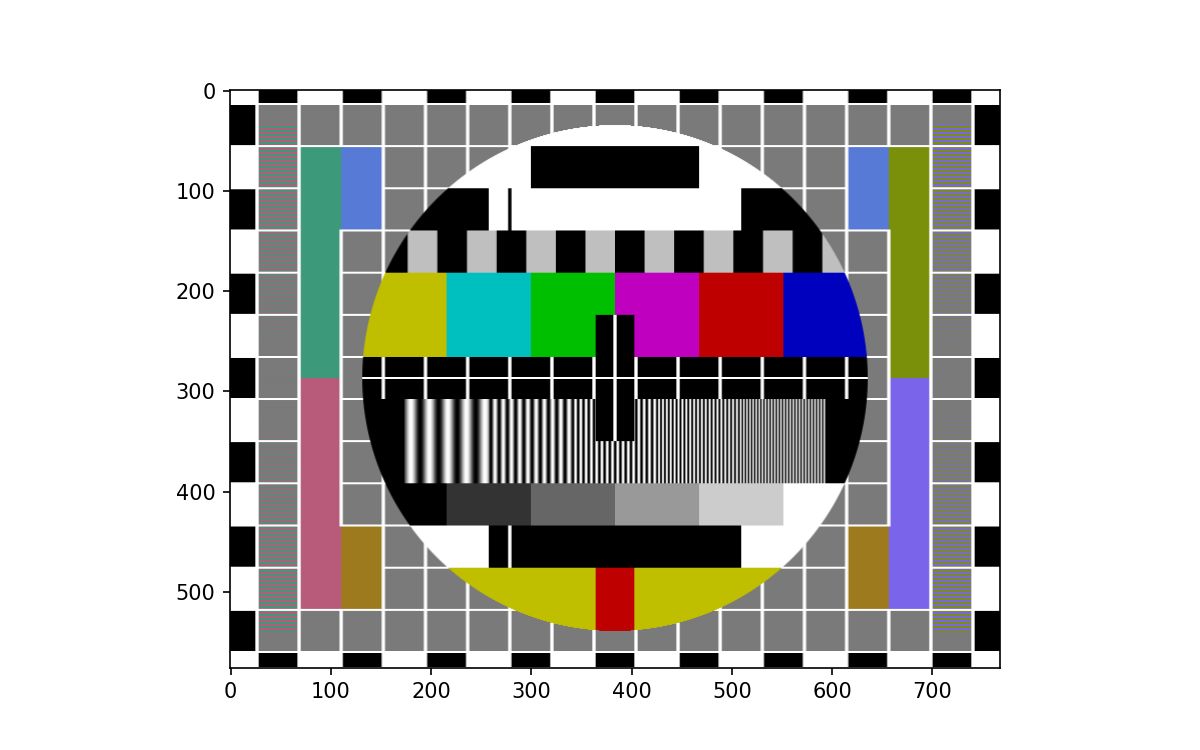

In [3]:
plt.figure(figsize=(8,5))
plt.imshow(image)
plt.show()

Use this image to answer the following questions:

__c)__ How is the image represented in python. How is color represented?

__Answer:__

>This image is represented in python by a n x n x 3 matrix, where each element in the nxn represents a pixel and one of the color values from 0 to 255.

__d)__ How are black and white represented? <br>
_Hint:_ You can use the interactive view to answer this question. See the preparation section at the top.

__Answer:__

>White is [255,255,255], black is [0,0,0]

__e)__ What are the dimensions of the image? How many megapixels does that correspond to?

__Answer:__

In [4]:
image.shape

(576, 768, 3)

Image has the dimensions 768x576, which corresponds to 0.44 MP

__f)__ What is the dynamic range of the image?<br>
Express your answer both in number of levels and in bit-depth.

__Answer__:

>8-bit depth. 256 levels.

__g)__ Show the image again with _imshow_ , but submit only the first index of the 3rd dimension of the image matrix. 
Explain!<br> 
To extract the first dimension, use: variable_name[:,:,0]

__Answer:__

<IPython.core.display.Javascript object>


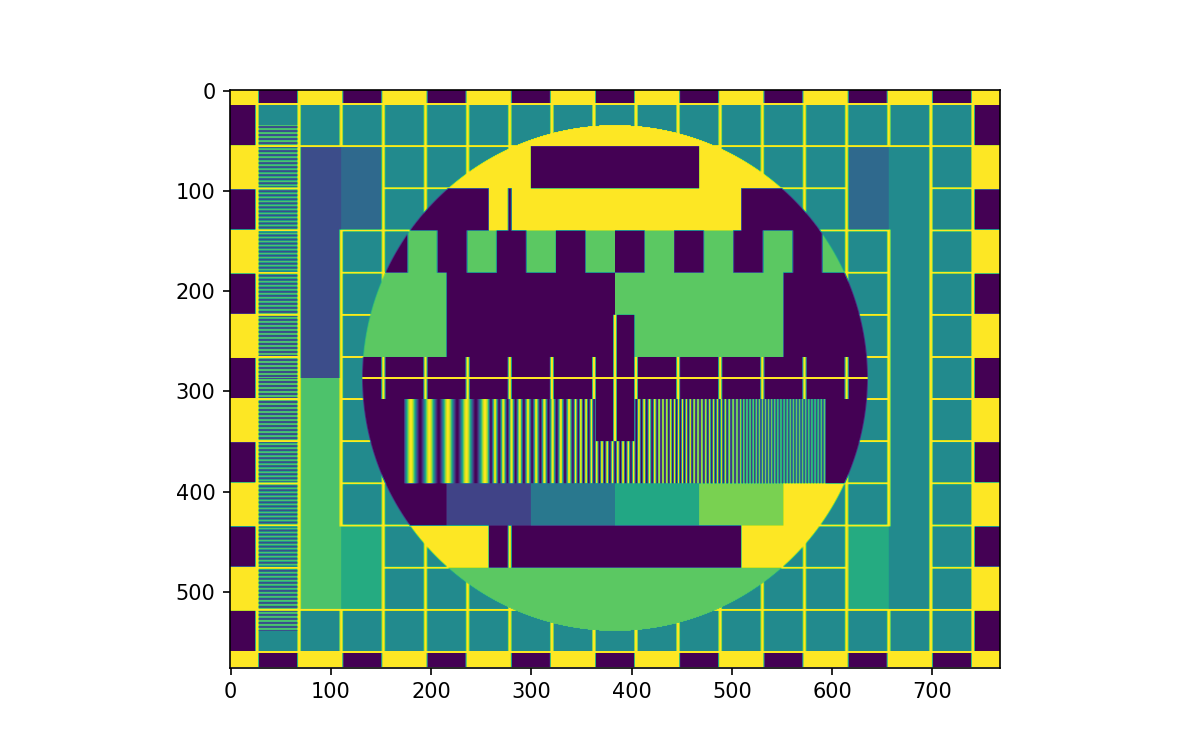

In [5]:
plt.figure(figsize=(8,5))
plt.imshow(image[:,:,0])
plt.show()

Here we see the same image, but instead of for example white being [255,255,255], it is now essentially converted to [255,0,0], which corresponds to yellow. This procedure has been done to all other values. Black is still the same.

___
## 2. DICOM images
__Learning Objectives:__
- Load a DICOM image and display it
- Learn to extract information form the DICOM-header

DICOM is a widely used medical image format. Basically ALL image data at the<br>
hospital will be DICOM. A DICOM file contains not only the image data but also<br>
information about the patient and how the image was acquired.<br>
More information about what can be stored in the DICOM header can be found under <br>
https://dicom.innolitics.com/ciods

Pydicom, which is loaded at the top, is a python package that makes it 
easy to work with DICOM files.<br>
A documentaion can be found under http://pydicom.github.io/pydicom/stable/getting_started.html<br>


<IPython.core.display.Javascript object>


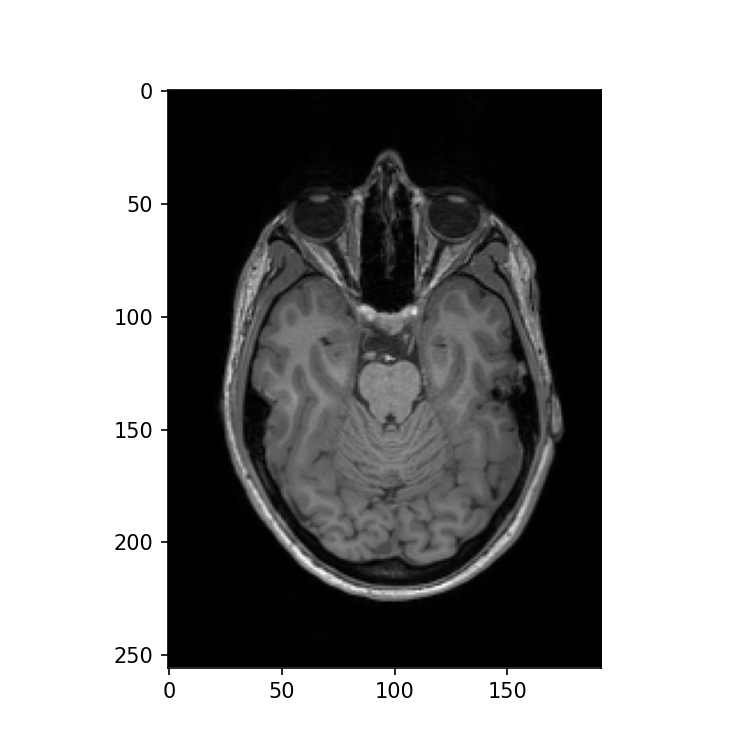

In [6]:
# read the dicom image
dicom_image = pydicom.dcmread('brain.dcm')

# the actual image is stored under pixel_array
brain_image = dicom_image.pixel_array

# Display the image
plt.figure(figsize=(5,5))
plt.imshow(brain_image, cmap='gray')
plt.show()

# To display the image header, you can use
#print(dicom_image)

__a)__ What is the dynamic range in the image

__Answer:__

In [7]:
print("dynamic range in pixels = ",brain_image.max()-brain_image.min())

dynamic range in pixels =  535


__b)__ Find out when the image was acquired and where. What is the name, age, gender<br>
   and weight of the patient? What image modality is it?
   
__Answer:__

>2012-11-27 St.Olavs Univ.Hospital, lab 37. Name of patient is MV121127_01^fmri01?. Female. 25 years. 62kg. Image modality is MR


__c)__ Use the optional inputs _vmin_ and _vmax_ to the _imshow_ function to modify the window level setting.
Display the image with at least 3 different window levels.


<IPython.core.display.Javascript object>


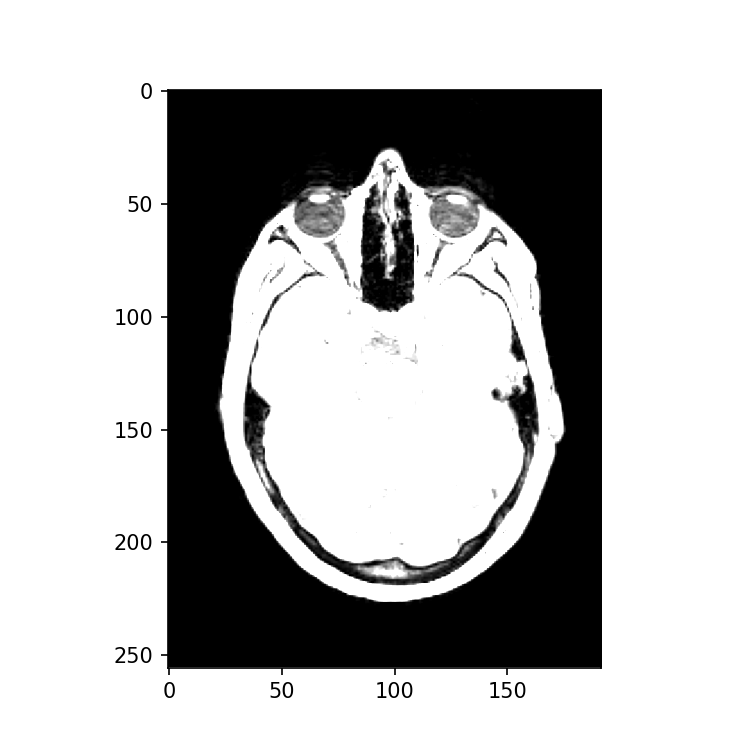

<IPython.core.display.Javascript object>


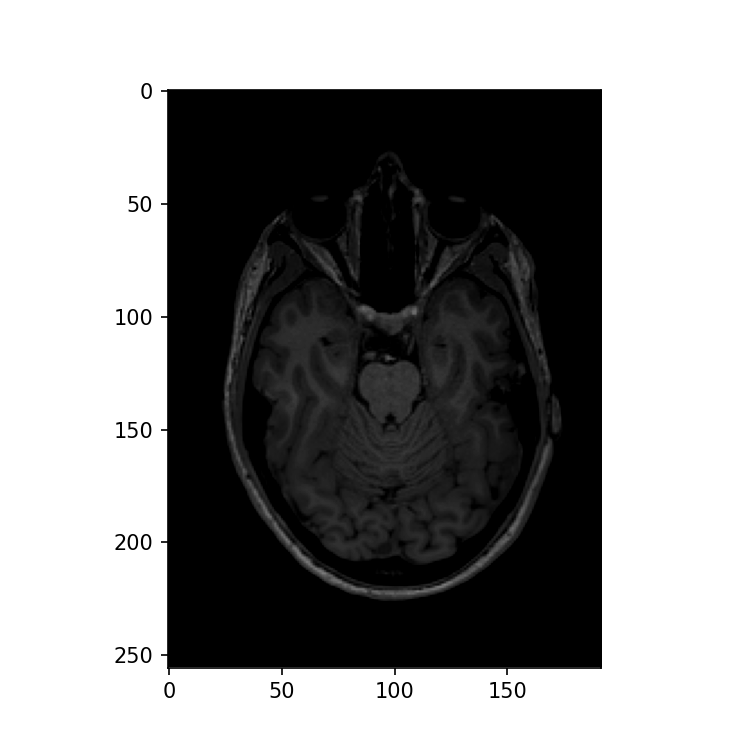

<IPython.core.display.Javascript object>


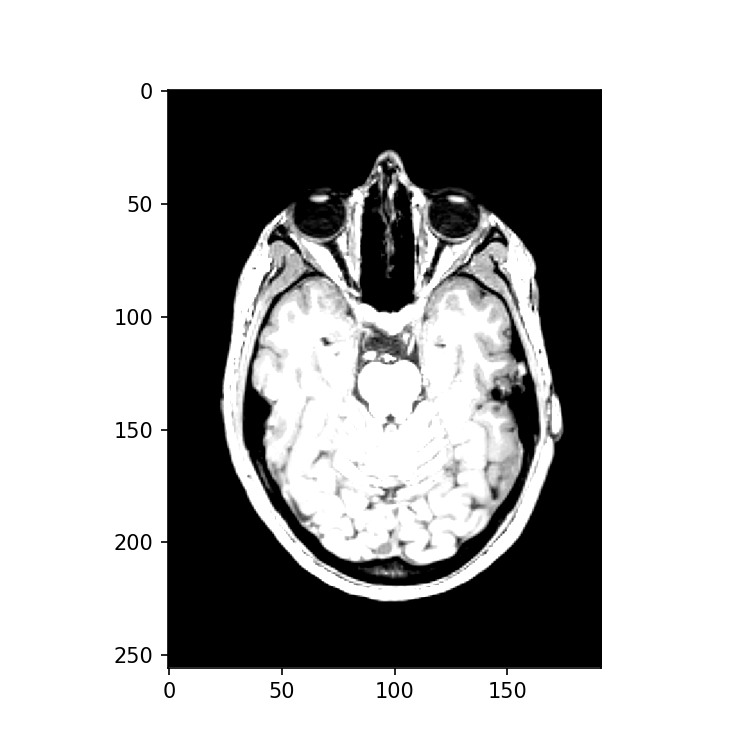

In [8]:
# Display the image
plt.figure(figsize=(5,5))
plt.imshow(brain_image, cmap='gray',vmin=10,vmax=100)
plt.figure(figsize=(5,5))
plt.imshow(brain_image, cmap='gray',vmin=100,vmax=1000)
plt.figure(figsize=(5,5))
plt.imshow(brain_image, cmap='gray',vmin=50,vmax=200)

plt.show()


## 3. Some properties of the Discrete Fourier Transfomation<br>

<IPython.core.display.Javascript object>


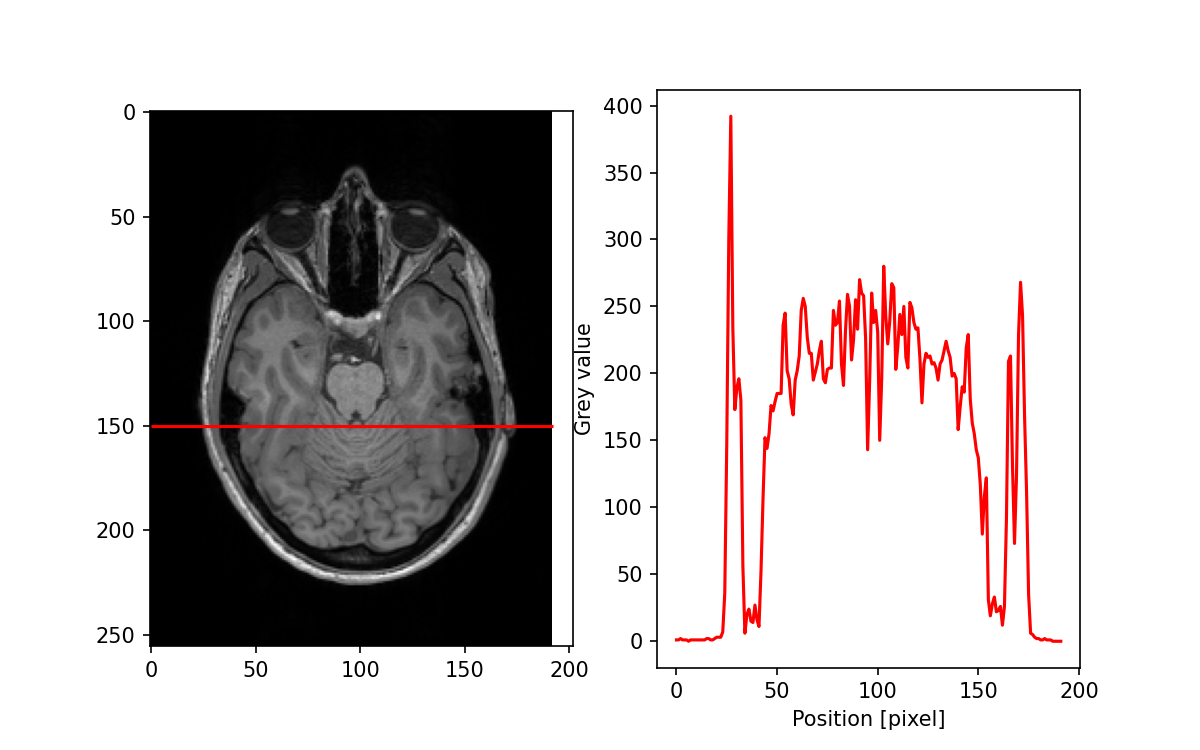

In [9]:
# First, we aqcuire a line profile through the brain image from the previous task

position = 150
image_profile = brain_image[position, :] # acquire a line profile

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.imshow(brain_image, cmap='gray')
plt.hlines(position, 0, 192, color='red')

plt.subplot(1,2,2)
plt.plot(image_profile, 'r')
plt.xlabel('Position [pixel]')      
plt.ylabel('Grey value')            
plt.show()

__a)__ Calculate the Discrete Fourier Transformation (DFT) of the acquired profile.<br>
Use the fft module by numpy (Function: _np.fft.fft_ ). <br>
The resulting vector should consist of complex numbers. <br>
   Plot the resulting real and imaginary values as well as magnitude and phase.
   _(4 Plots!)_ <br>
_Optional:_ Try to apply _np.unwrap()_ to the phase 

<IPython.core.display.Javascript object>


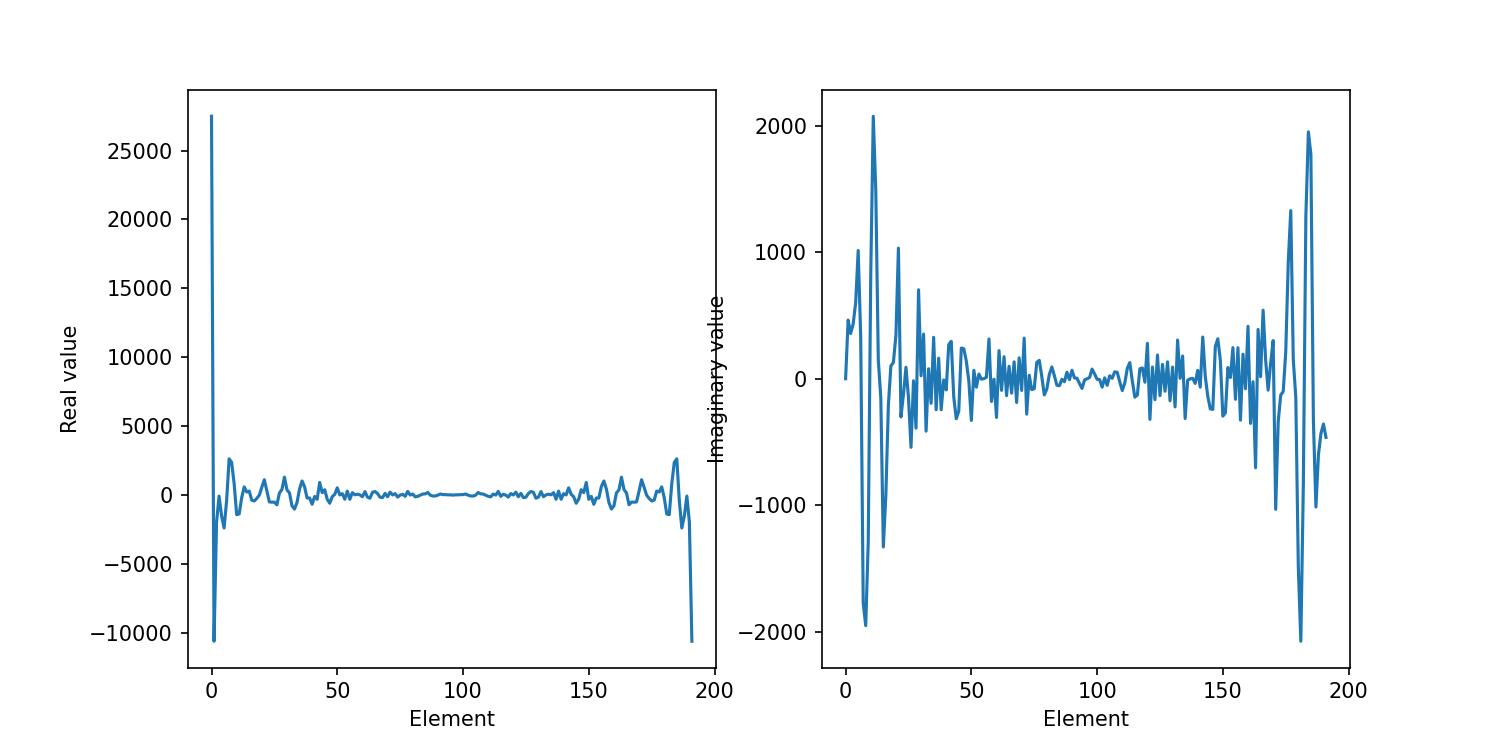

<IPython.core.display.Javascript object>


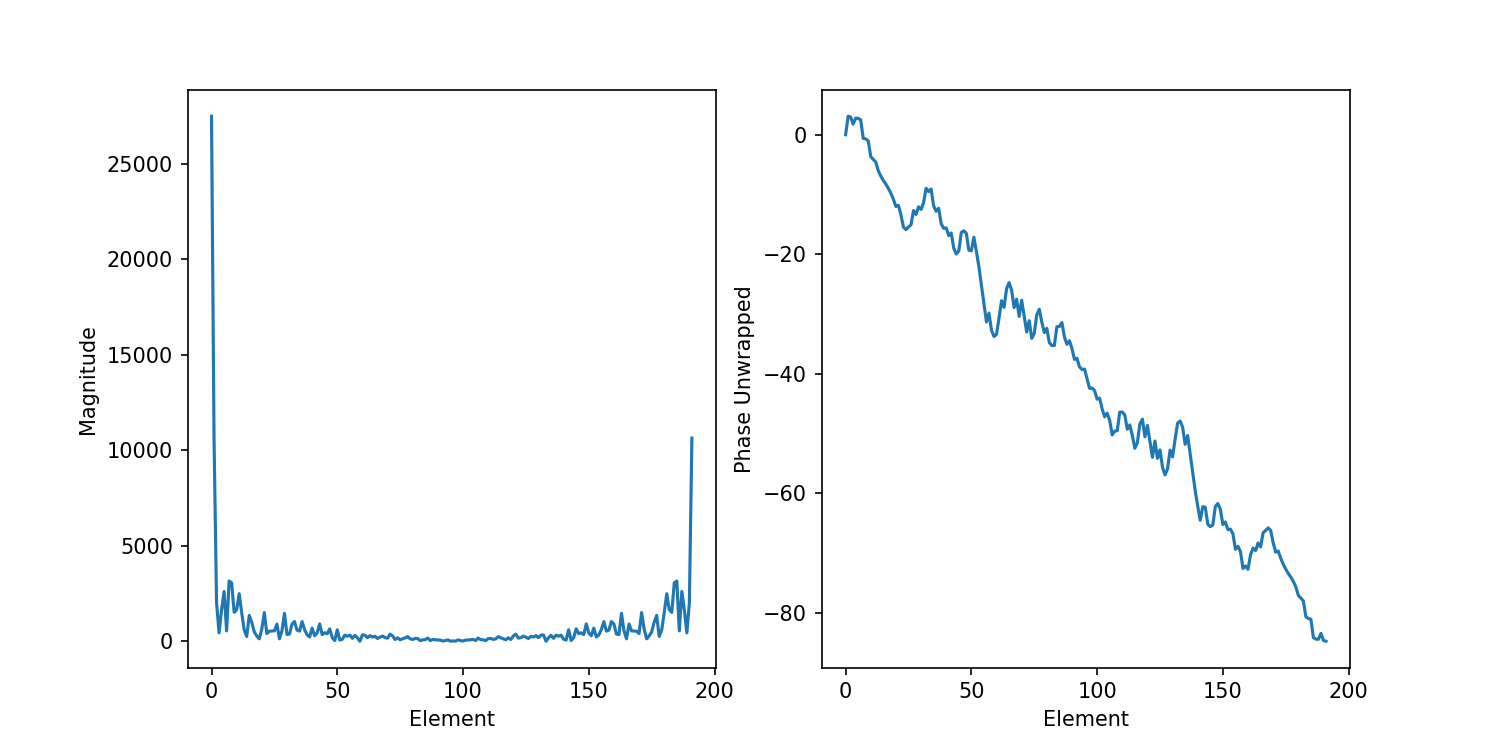

In [10]:
fourier=scipy.fft.fft(image_profile) #scipy is faster than np
x = fourier.real
y = fourier.imag
magnitude=abs(fourier)
phase=np.angle(fourier)
unwrap=np.unwrap(phase)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x)
plt.ylabel('Real value')
plt.xlabel('Element')

plt.subplot(1,2,2)
plt.plot(y)
plt.ylabel('Imaginary value')
plt.xlabel('Element')
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(magnitude)
plt.ylabel('Magnitude')
plt.xlabel('Element')

plt.subplot(1,2,2)
plt.plot(unwrap)
plt.ylabel('Phase Unwrapped')
plt.xlabel('Element')
plt.show()





__b)__ Explain what the function 'fftshift' in the numpy.fft module does.

<IPython.core.display.Javascript object>


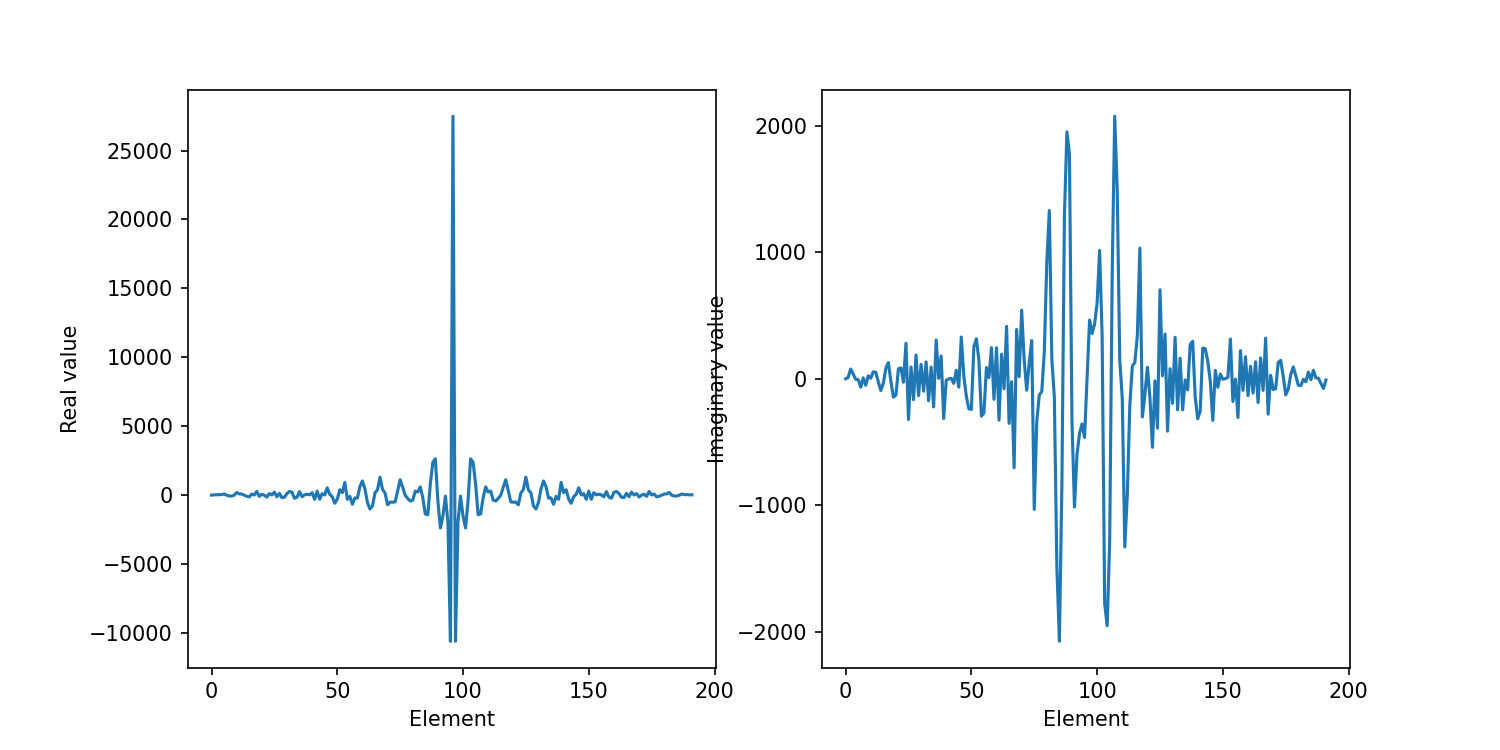

<IPython.core.display.Javascript object>


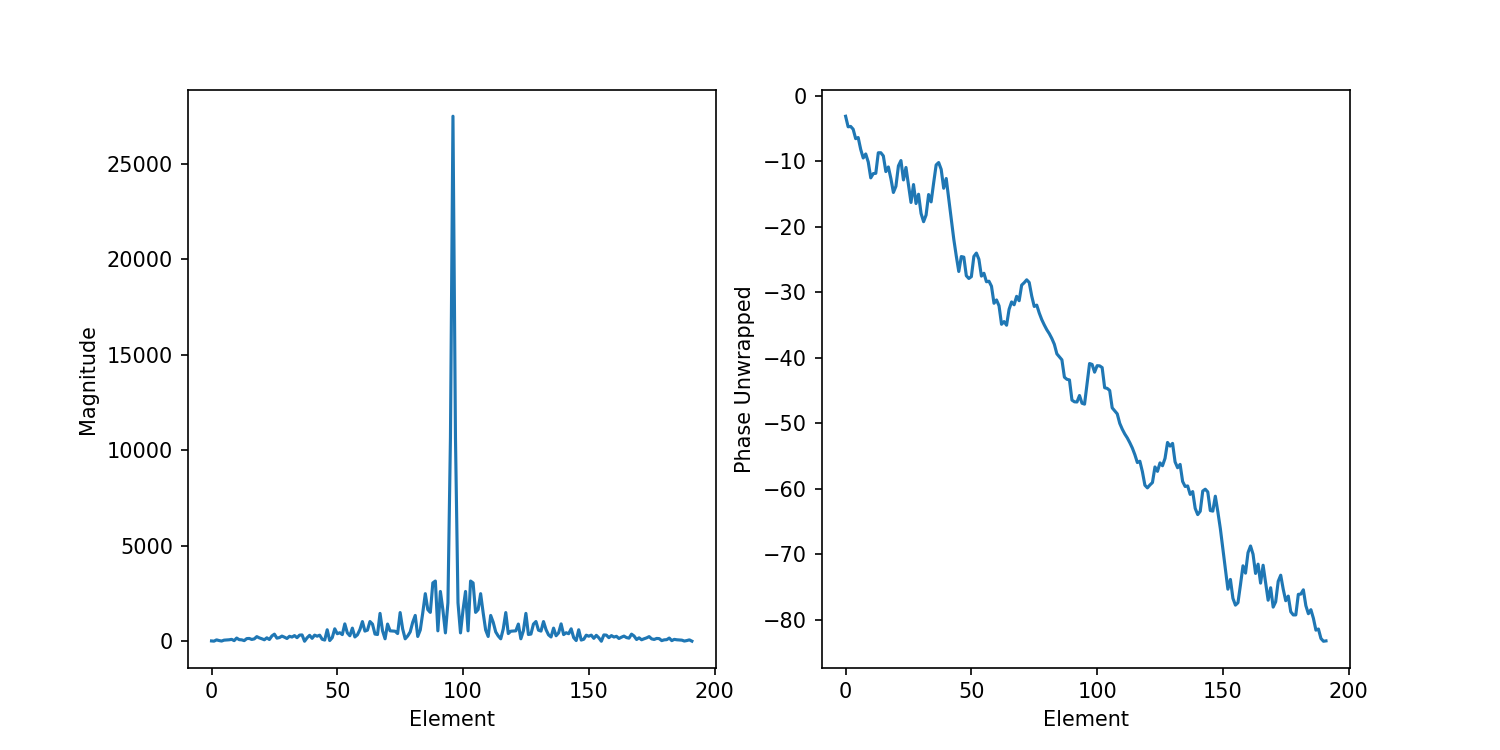

In [11]:
fourier=scipy.fft.fft(image_profile) #scipy is faster than np
fourier=scipy.fft.fftshift(fourier)
x = fourier.real
y = fourier.imag

magnitude=abs(fourier)
phase=np.angle(fourier)
unwrap=np.unwrap(phase)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x)
plt.ylabel('Real value')
plt.xlabel('Element')

plt.subplot(1,2,2)
plt.plot(y)
plt.ylabel('Imaginary value')
plt.xlabel('Element')
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(magnitude)
plt.ylabel('Magnitude')
plt.xlabel('Element')

plt.subplot(1,2,2)
plt.plot(unwrap)
plt.ylabel('Phase Unwrapped')
plt.xlabel('Element')
plt.show()





> _A:_ <br>
It makes sure that the middle element value is set to zero and then adjusts all the other values.


## 4. 2D Fourier Transform of an image


<IPython.core.display.Javascript object>


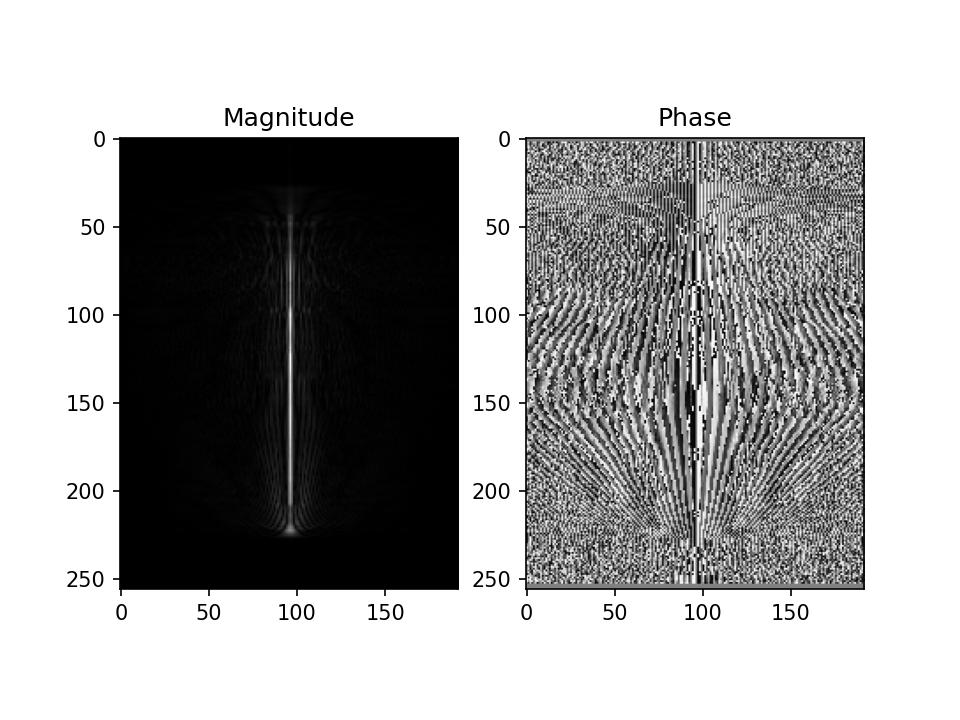

In [12]:
plt.rcParams['image.cmap'] = 'gray' # Set the collormap to gray for the following plots

#We can perform the Fourier-transform on each row in the image:
[nRows, nColumns] = brain_image.shape  #get the dimensions of brain_image
IM = np.empty(brain_image.shape, dtype=complex ) # preallocate empty matrix

for m in range(nRows):
    IM[m,:] = np.fft.fftshift(np.fft.fft(brain_image[m,:]))

plt.figure()
plt.subplot(1,2,1); plt.imshow(np.absolute(IM)); plt.title('Magnitude')
plt.subplot(1,2,2); plt.imshow(np.angle(IM));    plt.title('Phase')
plt.show()

Since the magnitude of the low-frequency components are usually much higher<br>
than the magnitude of the high-frequency components, we often plot log(magnitude) instead:

<IPython.core.display.Javascript object>


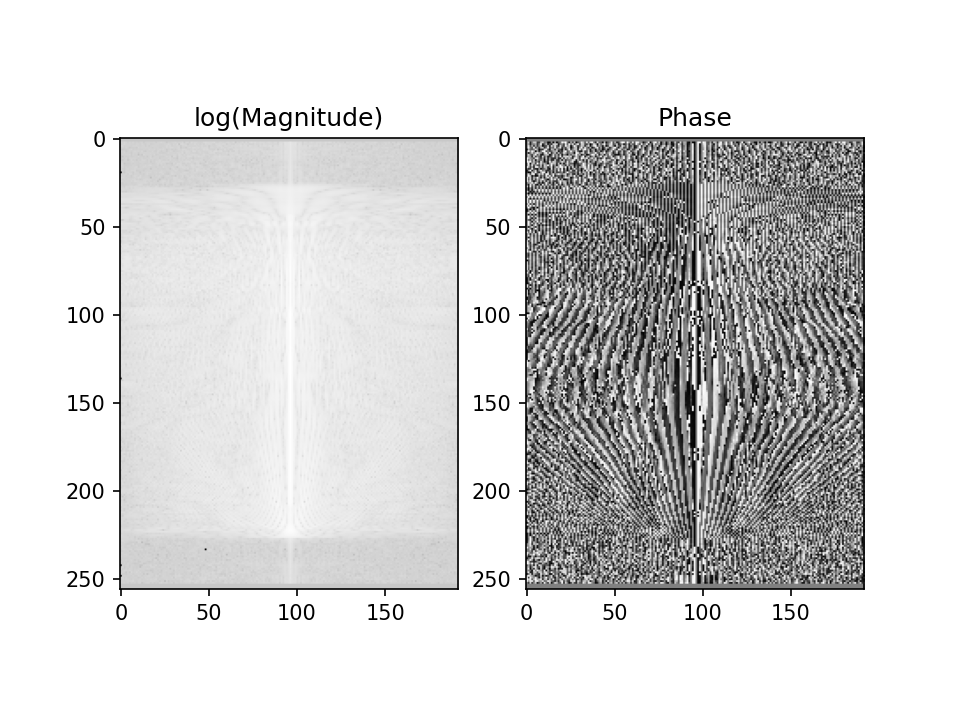

In [13]:
logMag = np.log(np.absolute(IM), where=np.absolute(IM)!=0 )    # use 'where' to avoid log(0)
plt.figure()
plt.subplot(1,2,1); plt.imshow(logMag); plt.title('log(Magnitude)')
plt.subplot(1,2,2); plt.imshow(np.angle(IM)); plt.title('Phase')
plt.show()

<IPython.core.display.Javascript object>


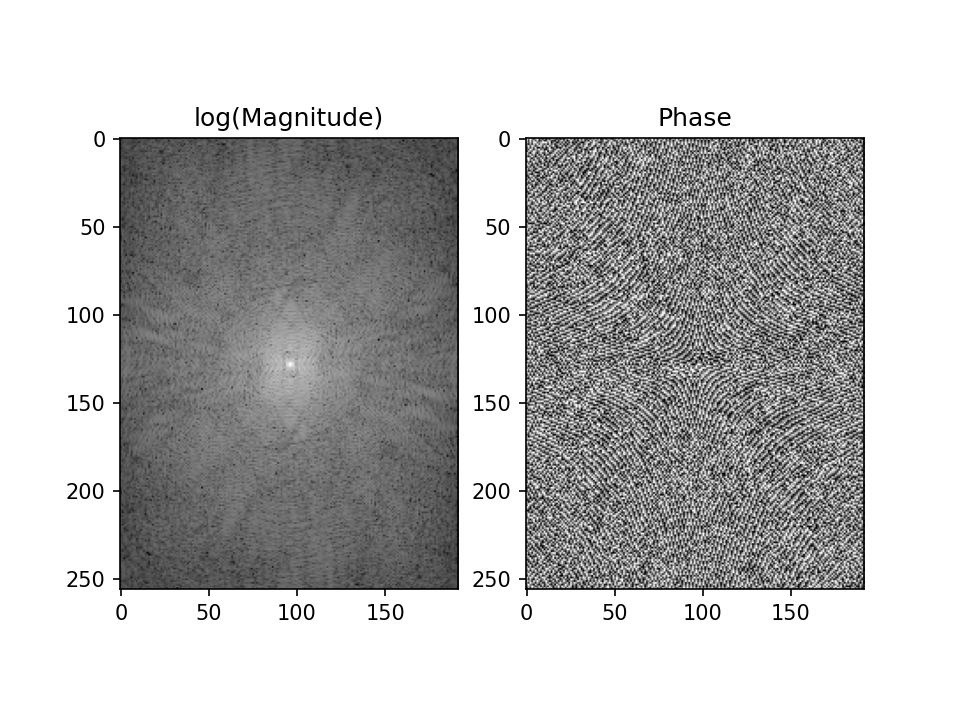

In [14]:
#Next we perform the Fourier-transform for each collumn:
IM2 = np.empty(brain_image.shape, dtype=complex )
for m in range(nColumns):
    IM2[:,m] = np.fft.fftshift(np.fft.fft(IM[:,m]))
    
#The resulting 2D transformed image:
logMag2 = np.log(np.absolute(IM2), where=np.absolute(IM2)!=0 )
plt.figure()
plt.subplot(1,2,1); plt.imshow( logMag2 ); plt.title('log(Magnitude)');
plt.subplot(1,2,2); plt.imshow(np.angle(IM2)); plt.title('Phase');
plt.show()


__a)__Does the order of the fft along the directions matter? Why, why not?

> _A:_ <br>It does not matter in which order you perform the 2fft. The FFT is a linear operation, and we are performing it once in each direction.


__Nota Bene:__ Be aware that there is also a dedicated 2D fft function in numpys fft module (_fft2_)

__b)__ Use the function (_fft2_) on the brain_image and display the result

<IPython.core.display.Javascript object>


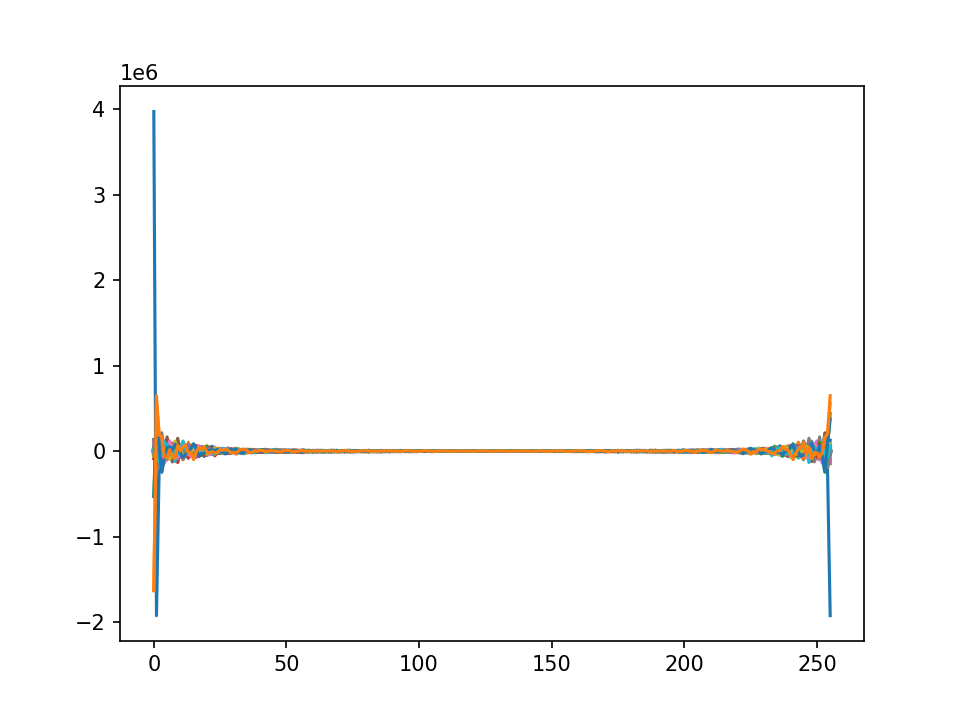

C:\Users\47936\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [15]:
plt.figure()
plt.plot((np.fft.fft2(brain_image)))
plt.show()

__c)__ 
Compare the results from the two different approaches. _(IM2 and the result from part b)_

<IPython.core.display.Javascript object>


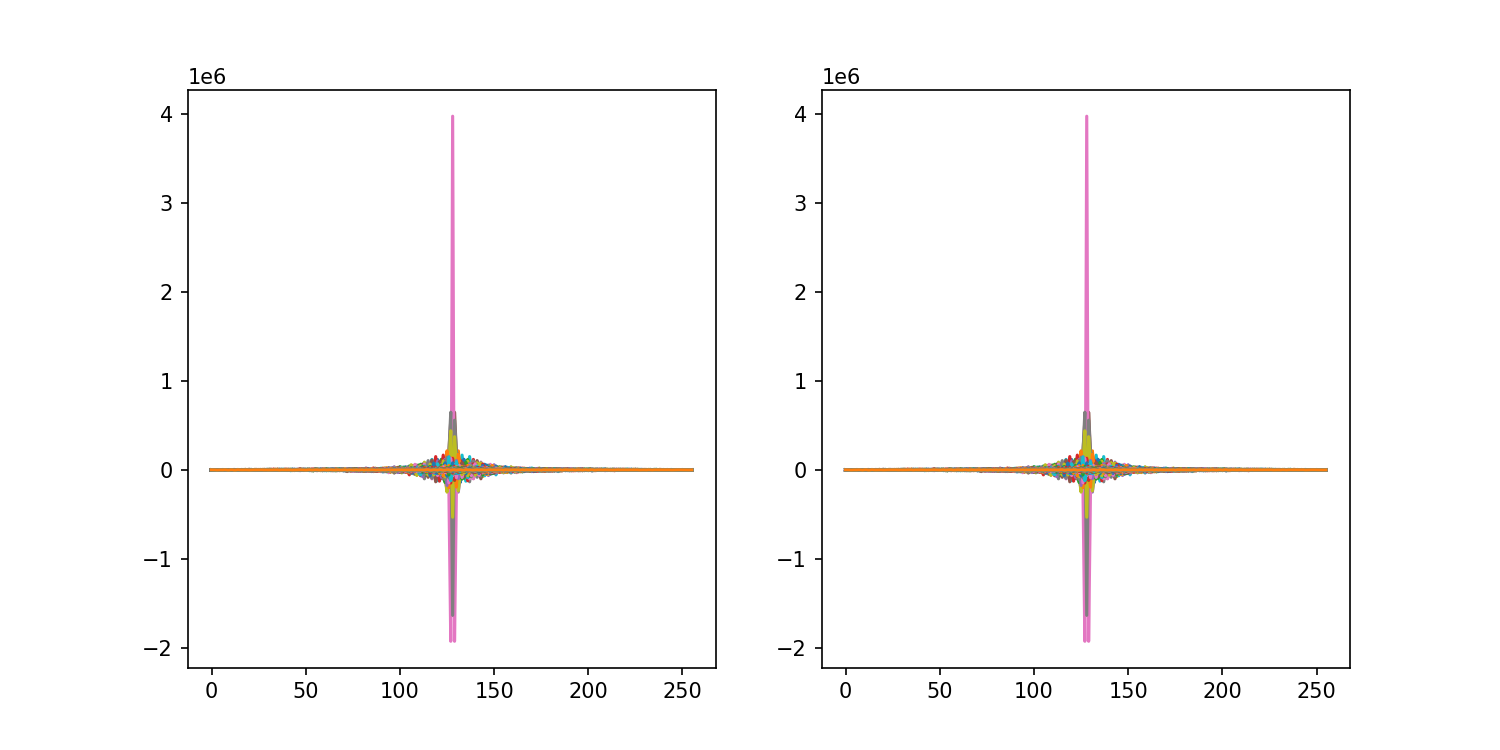

C:\Users\47936\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\47936\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [16]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(IM2)

plt.subplot(1,2,2)
plt.plot(np.fft.fftshift(np.fft.fft2(brain_image)))
plt.show()

The results look identical to me, so using fft2 is probably the better option. I would imagine that fft2 works in the same way as the rows and columns method.